# Step 1: Getting Twitter Developer Account
We require a Twitter Developer Account and the Twitter App in order to access the Tweepy Python package. 
Create a Twitter Developer Account first, then the Twitter App.

**How you create your Twitter Developer Account**
- Navigate to twitter Developer site https://developer.twitter.com/
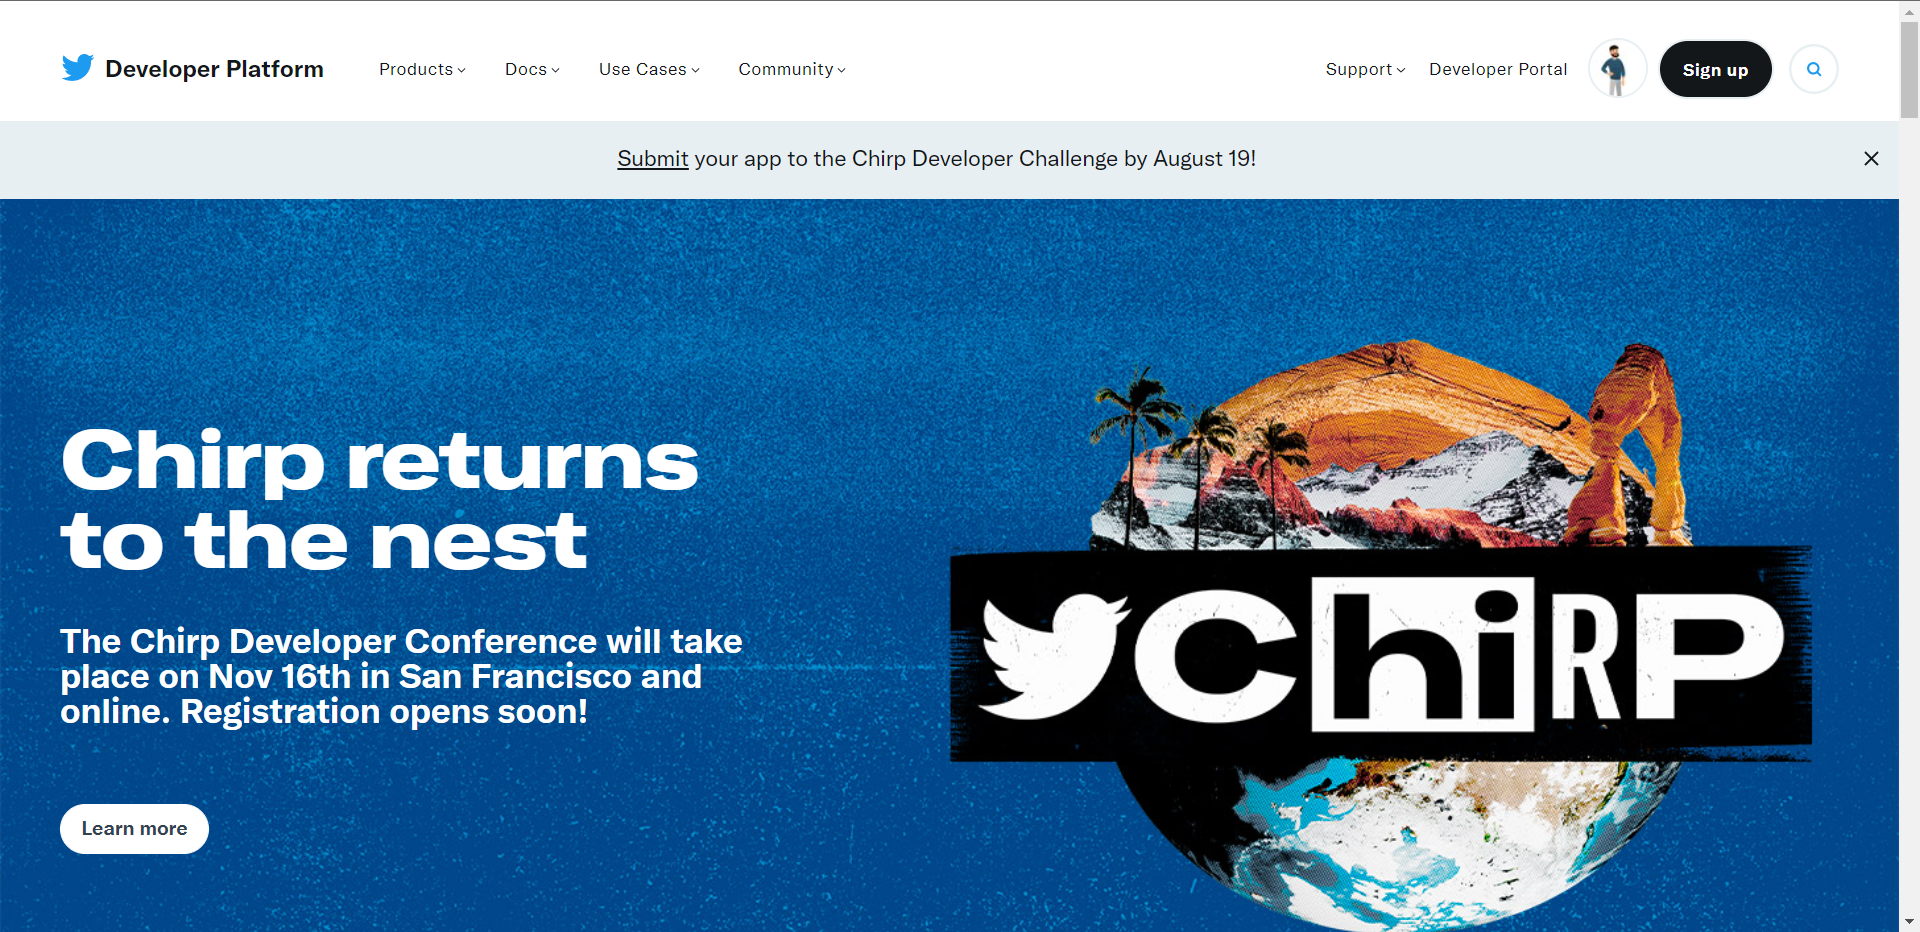


- Apply

- Select Developer Account. 

**NOTE:** This process might take a while as Twitter will need to verify your true purpose of needing a developer account.

# Step 2 : Install all necessary packages
    
**NOTE:** You will need to create a virtual environment in your system before installing the necessary libraiers

- *python -m venv .env* # To create a 
- *source .env/bin/activate* #Activate the virtual environment
- *pip install transformers* #install transformer
- *pip install transformers[torch]* #CPU Supported Pytorch users
- *pip install transformers[tf-cpu]* # CPU Supported transformer with Tensorflow users from tf2.0
- *pip install transformers[flax]* # Transformers and Flax
- *python -c "from transformers import pipeline; print(pipeline('sentiment-analysis')('we love you'))"* # Check if your transformer was properly installed
- *pip install tweepy* #Twitter library with an API that connect with Twitter to get API
- *pip install pandas* #Pandas for data manipulation and transformation
- *pip install configparser* #ConfigParser is a Python class which implements a basic configuration language for Python programs.

Get more information about installing transformer on your local machine : https://huggingface.co/docs/transformers/installation

# Step 3: Import all necessary Libraries

We will start by importing all necessary libraries.

In [1]:
import tweepy # Python Librarary for scrapping Twitter Data.
import configparser #ConfigParser is a Python class which implements a basic configuration language for Python programs.
import pandas as pd #Data Manipulation & Transformation
from datetime import date 
import re #RegEx : Regular expression

# Step 4: Configuration & Authentification:
A Python class called ConfigParser implements a simple configuration language for Python apps. It offers a framework resembling INI files for Microsoft Windows. ConfigParser enables the creation of Python applications that end users can simply modify.

This is done solely with the purpose of security. 
- Create a new text file on your system.
- Write out the following line of code that can be found in the image below.
- Copy and paste the following keys:
i. api_key = xxxxxxxxxx
ii. api_key_secret = xxxxxxxxxx
iii. access_token = xxxxxxxxxx
iv. access_token_secret = xxxxxxxxxx

This is done to prevent one from having accesss to your secret keys given to you when you created your developer account.

    
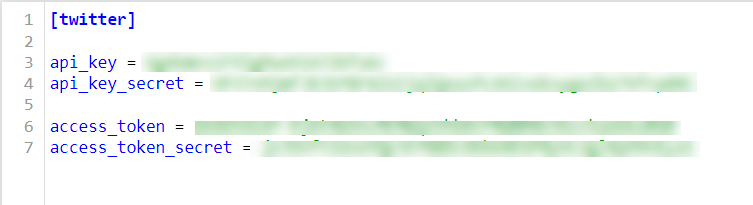

In [27]:
#read configs
config = configparser.ConfigParser()
config.read("config.ini") #The Config.ini file we just created

api_key = config["twitter"]["api_key"]
api_key_secret = config["twitter"]["api_key_secret"]

access_token = config["twitter"]["access_token"]
access_token_secret = config["twitter"]["access_token_secret"]

#print(access_token)

In [28]:
#Authentificate account to twitter App
#API Instance
auth = tweepy.OAuth1UserHandler(
   api_key, api_key_secret, access_token, access_token_secret
)

api = tweepy.API(auth)

## What is Tweepy? 

A Python package that makes it simple to use the Twitter API.

[Tweepy](https://www.tweepy.org/)

[geekforgeek](https://www.geeksforgeeks.org/python-user-object-in-tweepy/)

[Tweepy Github](https://github.com/tweepy/tweepy)

## Twitter API

The majority of Twitter's features are accessible to developers via the Twitter API. The API allows you to read and write data about Twitter entities including tweets, users, and trends.

Read more on Twitter API [Twitter API](https://developer.twitter.com/en/docs/twitter-api)

# Step 5: Setting up Tweepy

First, we will start by seraching for key words. The key word "Search Query" will be #LOVEDAMINI, a new album from the musician burna boy.

In [29]:
search_query = "#LOVEDAMINI" #The search query will scrap through twitter and get us the trend word #Lovedamini.

Due to Twitter API limitation I can only scrape 1000 tweet at once, so I repeated the same process multiple time and save the
data as csv file, which I later appeneded it

You can read more on Twitter Developer app rate limit: https://developer.twitter.com/en/docs/twitter-api/rate-limits

In [30]:
# get tweets from the API
tweets = tweepy.Cursor(api.search_tweets, q=search_query, lang="en").items(1000) #Set limit to 1000 tweet.

#Column header
columns = ["User", "Time", "Tweet", "Location", "Verified", "Tweet_Source", "Followers", "Retweet_Count", "Tweet ID"]
data = []
for tweet in tweets:
    data.append([tweet.user.screen_name, tweet.created_at, tweet.text, tweet.user.location, tweet.user.verified,
                tweet.source,tweet.user.followers_count,tweet.retweet_count,tweet.id])
    
Burna_Data = pd.DataFrame(data,columns=columns) # Creating a dataframe
Burna_Data.head()
    
#The since parameter gives issues cause Tweepy doesn't allow you to get tweet beyound 7 days.

,User,Time,Tweet,Location,Verified,Tweet_Source,Followers,Retweet_Count,Tweet ID
0,jonesike3,2022-07-13 11:51:48+00:00,RT @Outsider236: Burna Boy’s “Last Last” Spoti...,,False,Twitter for iPhone,334,91,1547187032715296770
1,kvnq_sammie,2022-07-13 11:51:44+00:00,RT @Burnaboystats1: #LoveDamini has surpasse...,On the streets,False,Twitter for Android,2153,62,1547187014658834432
2,_Ellen55,2022-07-13 11:51:41+00:00,RT @chartdata: .@burnaboy's #LOVEDAMINI aiming...,Krusty Krab,False,Twitter for iPhone,3105,717,1547187002528960512
3,burnalovedamini,2022-07-13 11:51:38+00:00,RT @Yxng_KinG_: That @burnaboy album is maddd🤬...,,False,Twitter for Android,385,19,1547186989404938241
4,burnalovedamini,2022-07-13 11:51:35+00:00,RT @bmspacestore: Common Person is reality in ...,,False,Twitter for Android,385,5,1547186977098928135


In [31]:
#Save data into csv file using Pandas.
Burna_Data.to_csv("LOVEDAMINI_8.csv")

# Step 6: Append all File

Due to the limitation we are going to scrape for 1000 tweet in multiple time and append all the data together.

To complete this process I will need to open another Jupyter workbook **named append**. Check the Github repository for Append file and use that to run your code.

## Step 6.1 : You need to append all the 7 csv files together

In [ ]:
import os
import glob
import pandas as pd
os.chdir("/mydir") # Change “/mydir” to your desired working directory.

In [ ]:
extension = 'csv' #This will help select only the csv file.
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [ ]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "Append.csv", index=False, encoding='utf-8-sig') #encoding = ‘utf-8-sig’ is added to overcome the issue
#when exporting ‘Non-English’ languages.

# Step 7 : Data Cleaning & Preprocessing

At this stage we will need to clean the data in different forms

In [3]:
Burna_Data_Damini = pd.read_csv("Append.csv")
Burna_Data_Damini.head()

,Unnamed: 0,User,Time,Tweet,Location,Verified,Tweet_Source,Followers,Retweet_Count,Tweet ID
0,0,thisispandora23,2022-07-09 23:51:31+00:00,RT @ArewaAdebukolaa: That part burna said “say...,Outside,False,Twitter for iPhone,1982,31,1545918601835724801
1,1,eddyofficial001,2022-07-09 23:51:30+00:00,RT @eddyofficial001: 1. Cloak &amp; Dagger\n2....,"Lagos, Nigeria",False,Twitter for iPhone,166,6,1545918600510414854
2,2,Hillzpapii,2022-07-09 23:51:30+00:00,RT @backroadgee: After listen @burnaboy album ...,"Lagos,Nigeria.",False,Twitter for iPhone,334,232,1545918599063375873
3,3,thisispandora23,2022-07-09 23:51:27+00:00,RT @UnrulyOutsider: ‘ He sampled Fela’ people ...,Outside,False,Twitter for iPhone,1982,64,1545918588510523393
4,4,theshyghostx,2022-07-09 23:51:27+00:00,RT @Callmevatti: Went crazy on this nsg type b...,Nigeria,False,Twitter for Android,190,10,1545918588468580352


In [4]:
Burna_Data_Damini.drop(['Unnamed: 0'], 1, inplace=True) #This is used to remove unwated columns "Unnamed"
Burna_Data_Damini.head()

C:\Users\TemidayoOmoniyi\AppData\Local\Temp\ipykernel_5412\1506853927.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  Burna_Data_Damini.drop(['Unnamed: 0'], 1, inplace=True) #This is used to remove unwated columns "Unnamed"


,User,Time,Tweet,Location,Verified,Tweet_Source,Followers,Retweet_Count,Tweet ID
0,thisispandora23,2022-07-09 23:51:31+00:00,RT @ArewaAdebukolaa: That part burna said “say...,Outside,False,Twitter for iPhone,1982,31,1545918601835724801
1,eddyofficial001,2022-07-09 23:51:30+00:00,RT @eddyofficial001: 1. Cloak &amp; Dagger\n2....,"Lagos, Nigeria",False,Twitter for iPhone,166,6,1545918600510414854
2,Hillzpapii,2022-07-09 23:51:30+00:00,RT @backroadgee: After listen @burnaboy album ...,"Lagos,Nigeria.",False,Twitter for iPhone,334,232,1545918599063375873
3,thisispandora23,2022-07-09 23:51:27+00:00,RT @UnrulyOutsider: ‘ He sampled Fela’ people ...,Outside,False,Twitter for iPhone,1982,64,1545918588510523393
4,theshyghostx,2022-07-09 23:51:27+00:00,RT @Callmevatti: Went crazy on this nsg type b...,Nigeria,False,Twitter for Android,190,10,1545918588468580352


In [5]:
Burna_Data_Damini.shape #Get the number of Rows & Columns

(7000, 9)

In [6]:
Burna_Data_Damini.info() # Get information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   User           7000 non-null   object
 1   Time           7000 non-null   object
 2   Tweet          7000 non-null   object
 3   Location       4842 non-null   object
 4   Verified       7000 non-null   bool  
 5   Tweet_Source   7000 non-null   object
 6   Followers      7000 non-null   int64 
 7   Retweet_Count  7000 non-null   int64 
 8   Tweet ID       7000 non-null   int64 
dtypes: bool(1), int64(3), object(5)
memory usage: 444.5+ KB


In [7]:
Burna_Data_Damini.describe() # Descriptive statistics include those that summarize the central tendency, 
#dispersion and shape of a dataset’s distribution, excluding NaN values.

,Followers,Retweet_Count,Tweet ID
count,7.000000e+03,7000.000000,7.000000e+03
mean,2.718634e+03,338.784714,1.546072e+18
std,8.376458e+04,880.012711,2.455087e+14
min,0.000000e+00,0.000000,1.545908e+18
25%,1.900000e+02,9.000000,1.545915e+18
50%,6.200000e+02,49.000000,1.545920e+18
75%,1.527000e+03,218.000000,1.546398e+18
max,6.991174e+06,10477.000000,1.546518e+18


In [8]:
Burna_Data_Damini.isnull().sum() # Get the empty cells

User                0
Time                0
Tweet               0
Location         2158
Verified            0
Tweet_Source        0
Followers           0
Retweet_Count       0
Tweet ID            0
dtype: int64

In [9]:
Burna_Data_Damini.columns #Show column header

Index(['User', 'Time', 'Tweet', 'Location', 'Verified', 'Tweet_Source',
       'Followers', 'Retweet_Count', 'Tweet ID'],
      dtype='object')

In [10]:
Burna_Data_Damini["Tweet"].head() #Show column of tweets only

0    RT @ArewaAdebukolaa: That part burna said “say...
1    RT @eddyofficial001: 1. Cloak &amp; Dagger\n2....
2    RT @backroadgee: After listen @burnaboy album ...
3    RT @UnrulyOutsider: ‘ He sampled Fela’ people ...
4    RT @Callmevatti: Went crazy on this nsg type b...
Name: Tweet, dtype: object

# Find & Remove Duplicate

In [11]:
Burna_Data_Damini.Tweet.duplicated() # Spcecific column

0       False
1       False
2       False
3       False
4       False
        ...  
6995    False
6996     True
6997     True
6998     True
6999    False
Name: Tweet, Length: 7000, dtype: bool

In [12]:
Burna_Data_Damini.Tweet.duplicated().sum() # Duplicate count for Tweet

5708

In [13]:
Burna_Data_Damini.duplicated()#for the whole dataset/dataframe

0       False
1       False
2       False
3       False
4       False
        ...  
6995    False
6996    False
6997    False
6998    False
6999    False
Length: 7000, dtype: bool

In [14]:
Burna_Data_Damini.duplicated().sum() # This to count the amount of duplicate values

1788

In [15]:
(~Burna_Data_Damini.duplicated()).sum() #Count unique values

5212

In [16]:
Burna_Data_Damini.drop_duplicates(inplace=True) # We can set the argumentinplace=True to remove duplicates 
#from the original DataFrame

In [17]:
Burna_Data_Damini.shape

(5212, 9)

In [18]:
Burna_Data_Damini.duplicated().sum()

0

In [19]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
Burna_Data_Damini["Tweet"]= Burna_Data_Damini["Tweet"].apply(cleanTxt)

#Show the clean text
Burna_Data_Damini.head(50)

,User,Time,Tweet,Location,Verified,Tweet_Source,Followers,Retweet_Count,Tweet ID
0,thisispandora23,2022-07-09 23:51:31+00:00,That part burna said “say your body dey ginge...,Outside,False,Twitter for iPhone,1982,31,1545918601835724801
1,eddyofficial001,2022-07-09 23:51:30+00:00,1. Cloak &amp; Dagger\n2. Whiskey \n3. Differ...,"Lagos, Nigeria",False,Twitter for iPhone,166,6,1545918600510414854
2,Hillzpapii,2022-07-09 23:51:30+00:00,After listen album for 2 days straight. I be...,"Lagos,Nigeria.",False,Twitter for iPhone,334,232,1545918599063375873
3,thisispandora23,2022-07-09 23:51:27+00:00,‘ He sampled Fela’ people are the most disapp...,Outside,False,Twitter for iPhone,1982,64,1545918588510523393
4,theshyghostx,2022-07-09 23:51:27+00:00,"Went crazy on this nsg type beat🤯🔥\nLike, ret...",Nigeria,False,Twitter for Android,190,10,1545918588468580352
5,sportslovin,2022-07-09 23:51:25+00:00,. earned his biggest streaming day of all-tim...,Places Unknown,False,Twitter for Android,266,596,1545918577676496897
6,Kcobiefule,2022-07-09 23:51:24+00:00,Twitter please start working on verifying our...,"Lagos, Nigeria",False,Twitter for Android,2357,91,1545918575441055746
7,Fikayofmars,2022-07-09 23:51:24+00:00,"_ As you are listening to “For my hand” , make...",Hogwarts🧝‍♂️,False,Twitter for iPhone,5213,276,1545918575390621697
8,TroyesDave,2022-07-09 23:51:24+00:00,_LOT1 Was just looking around den I came acros...,"Lagos, Nigeria",False,Twitter for Android,40,3,1545918573578801152
9,megasanctus,2022-07-09 23:51:24+00:00,_LOT1 Was just looking around den I came acros...,NaN,False,Twitter for Android,0,3,1545918572693708806


In [20]:
#Next we have to remove emoji & Unicode from the Tweet data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
Burna_Data_Damini["Tweet"]= Burna_Data_Damini["Tweet"].apply(remove_emoji)

#Show the clean text
Burna_Data_Damini.head(50)

,User,Time,Tweet,Location,Verified,Tweet_Source,Followers,Retweet_Count,Tweet ID
0,thisispandora23,2022-07-09 23:51:31+00:00,That part burna said “say your body dey ginge...,Outside,False,Twitter for iPhone,1982,31,1545918601835724801
1,eddyofficial001,2022-07-09 23:51:30+00:00,1. Cloak &amp; Dagger\n2. Whiskey \n3. Differ...,"Lagos, Nigeria",False,Twitter for iPhone,166,6,1545918600510414854
2,Hillzpapii,2022-07-09 23:51:30+00:00,After listen album for 2 days straight. I be...,"Lagos,Nigeria.",False,Twitter for iPhone,334,232,1545918599063375873
3,thisispandora23,2022-07-09 23:51:27+00:00,‘ He sampled Fela’ people are the most disapp...,Outside,False,Twitter for iPhone,1982,64,1545918588510523393
4,theshyghostx,2022-07-09 23:51:27+00:00,"Went crazy on this nsg type beat\nLike, retwe...",Nigeria,False,Twitter for Android,190,10,1545918588468580352
5,sportslovin,2022-07-09 23:51:25+00:00,. earned his biggest streaming day of all-tim...,Places Unknown,False,Twitter for Android,266,596,1545918577676496897
6,Kcobiefule,2022-07-09 23:51:24+00:00,Twitter please start working on verifying our...,"Lagos, Nigeria",False,Twitter for Android,2357,91,1545918575441055746
7,Fikayofmars,2022-07-09 23:51:24+00:00,"_ As you are listening to “For my hand” , make...",Hogwarts🧝‍♂️,False,Twitter for iPhone,5213,276,1545918575390621697
8,TroyesDave,2022-07-09 23:51:24+00:00,_LOT1 Was just looking around den I came acros...,"Lagos, Nigeria",False,Twitter for Android,40,3,1545918573578801152
9,megasanctus,2022-07-09 23:51:24+00:00,_LOT1 Was just looking around den I came acros...,NaN,False,Twitter for Android,0,3,1545918572693708806


In [20]:
#Lowercase
#Lovedamini_df["Tweet"]= Lovedamini_df["Tweet"].str.lower() 

#You can lower the entire Tweet to lower case if you want but for this process I will ignore and continue with the cleaning 
#process.


In [21]:
Burna_Data_Damini.head()

,User,Time,Tweet,Location,Verified,Tweet_Source,Followers,Retweet_Count,Tweet ID
0,thisispandora23,2022-07-09 23:51:31+00:00,That part burna said “say your body dey ginge...,Outside,False,Twitter for iPhone,1982,31,1545918601835724801
1,eddyofficial001,2022-07-09 23:51:30+00:00,1. Cloak &amp; Dagger\n2. Whiskey \n3. Differ...,"Lagos, Nigeria",False,Twitter for iPhone,166,6,1545918600510414854
2,Hillzpapii,2022-07-09 23:51:30+00:00,After listen album for 2 days straight. I be...,"Lagos,Nigeria.",False,Twitter for iPhone,334,232,1545918599063375873
3,thisispandora23,2022-07-09 23:51:27+00:00,‘ He sampled Fela’ people are the most disapp...,Outside,False,Twitter for iPhone,1982,64,1545918588510523393
4,theshyghostx,2022-07-09 23:51:27+00:00,"Went crazy on this nsg type beat\nLike, retwe...",Nigeria,False,Twitter for Android,190,10,1545918588468580352


# Step 8: Create a Model for Sentiment Analysis

Transformers by Hugging Face is use for this project

In [23]:
#Import all necessary libraries.
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request
import torch

C:\Users\TemidayoOmoniyi\anaconda3\envs\tfp3.10\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


**If you want to remove stopwords from the Tweet you can write the line of code below,
but for the project I will ignore the use of stopwords as it affect the accuracy of the model.**

In [13]:
#Revome stop words
import nltk 
from textblob import TextBlob
nltk.download("stopwords")
from nltk.corpus import stopwords
#stopwords.words("english")
#",".join(stopwords.words("english"))
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TemidayoOmoniyi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
'''def remove_stop(x):
    return ",".join([word for word in str(x).split() if word not in stop_words])
Burna_Data_Damini["Tweet"]=Burna_Data_Damini["Tweet"].apply(lambda x : remove_stop(x))'''

'def remove_stop(x):\n    return ",".join([word for word in str(x).split() if word not in stop_words])\nBurna_Data_Damini["Tweet"]=Burna_Data_Damini["Tweet"].apply(lambda x : remove_stop(x))'

In [26]:
#stop_words = stopwords.words('english')
#Burna_Data_Damini["Tweet"]= Burna_Data_Damini["Tweet"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [27]:
Burna_Data_Damini.head()

,User,Time,Tweet,Location,Verified,Tweet_Source,Followers,Retweet_Count,Tweet ID
0,thisispandora23,2022-07-09 23:51:31+00:00,That part burna said “say your body dey ginge...,Outside,False,Twitter for iPhone,1982,31,1545918601835724801
1,eddyofficial001,2022-07-09 23:51:30+00:00,1. Cloak &amp; Dagger\n2. Whiskey \n3. Differ...,"Lagos, Nigeria",False,Twitter for iPhone,166,6,1545918600510414854
2,Hillzpapii,2022-07-09 23:51:30+00:00,After listen album for 2 days straight. I be...,"Lagos,Nigeria.",False,Twitter for iPhone,334,232,1545918599063375873
3,thisispandora23,2022-07-09 23:51:27+00:00,‘ He sampled Fela’ people are the most disapp...,Outside,False,Twitter for iPhone,1982,64,1545918588510523393
4,theshyghostx,2022-07-09 23:51:27+00:00,"Went crazy on this nsg type beat\nLike, retwe...",Nigeria,False,Twitter for Android,190,10,1545918588468580352


## 8.1 Download the twitter-roberta-base-sentiment

Twitter-roBERTa-base for Sentiment Analysis
This is a roBERTa-base model trained on ~58M tweets and finetuned for sentiment analysis with the TweetEval benchmark. This model is suitable for English (for a similar multilingual model, see XLM-T).

Link: https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment

It has the following **Labels: 0 -> Negative; 1 -> Neutral; 2 -> Positive**

In [28]:
#Load the model
roberta = "cardiffnlp/twitter-roberta-base-sentiment" #This will download the model from Hugging face site

model  = AutoModelForSequenceClassification.from_pretrained(roberta)

tokenizer = AutoTokenizer.from_pretrained(roberta)

#If this your first time using this, it will download the model for you online.

C:\Users\TemidayoOmoniyi\anaconda3\envs\tfp3.10\lib\site-packages\torch\_utils.py:133: UserWarning: Failed to initialize NumPy: module compiled against API version 0x10 but this version of numpy is 0xf (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:68.)
  t = torch.tensor([], dtype=storage.dtype, device=storage._untyped().device)


In [29]:
labels = ["Negative", "Neutral", "Positive"] #Stating out the label

In [30]:
#Sentiment Analysis
#'''encoded_tweet = tokenizer(Burna_Data_Damini["Tweet"], return_tensors="pt")
#print(encoded_tweet)'''

def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens) #Output
    return int(torch.argmax(result.logits))

Burna_Data_Damini["Sentiment"] = Burna_Data_Damini["Tweet"].apply(lambda x: sentiment_score(x[:512]))
#This might take a couple of minute depending on your  local machine speed. I will advise you do this process on Google
#Colab or other web based IDE.

In [31]:
Burna_Data_Damini.head(50)

,User,Time,Tweet,Location,Verified,Tweet_Source,Followers,Retweet_Count,Tweet ID,Sentiment
0,thisispandora23,2022-07-09 23:51:31+00:00,That part burna said “say your body dey ginge...,Outside,False,Twitter for iPhone,1982,31,1545918601835724801,1
1,eddyofficial001,2022-07-09 23:51:30+00:00,1. Cloak &amp; Dagger\n2. Whiskey \n3. Differ...,"Lagos, Nigeria",False,Twitter for iPhone,166,6,1545918600510414854,1
2,Hillzpapii,2022-07-09 23:51:30+00:00,After listen album for 2 days straight. I be...,"Lagos,Nigeria.",False,Twitter for iPhone,334,232,1545918599063375873,2
3,thisispandora23,2022-07-09 23:51:27+00:00,‘ He sampled Fela’ people are the most disapp...,Outside,False,Twitter for iPhone,1982,64,1545918588510523393,0
4,theshyghostx,2022-07-09 23:51:27+00:00,"Went crazy on this nsg type beat\nLike, retwe...",Nigeria,False,Twitter for Android,190,10,1545918588468580352,1
5,sportslovin,2022-07-09 23:51:25+00:00,. earned his biggest streaming day of all-tim...,Places Unknown,False,Twitter for Android,266,596,1545918577676496897,2
6,Kcobiefule,2022-07-09 23:51:24+00:00,Twitter please start working on verifying our...,"Lagos, Nigeria",False,Twitter for Android,2357,91,1545918575441055746,1
7,Fikayofmars,2022-07-09 23:51:24+00:00,"_ As you are listening to “For my hand” , make...",Hogwarts🧝‍♂️,False,Twitter for iPhone,5213,276,1545918575390621697,1
8,TroyesDave,2022-07-09 23:51:24+00:00,_LOT1 Was just looking around den I came acros...,"Lagos, Nigeria",False,Twitter for Android,40,3,1545918573578801152,2
9,megasanctus,2022-07-09 23:51:24+00:00,_LOT1 Was just looking around den I came acros...,NaN,False,Twitter for Android,0,3,1545918572693708806,2


In [32]:
Burna_Data_Damini["Sentiment"].value_counts() #Count the sentiment score.

2    3709
1    1335
0     168
Name: Sentiment, dtype: int64

In [34]:
#Group the range of sentiment to different categories
def getInsight(score):
    if score == 0:
        return "Negative"
    elif score == 1:
        return "Neutral"
    else:
        return "Positive"
    
Burna_Data_Damini["Insight"] = Burna_Data_Damini["Sentiment"].apply(getInsight)

Burna_Data_Damini.head()

,User,Time,Tweet,Location,Verified,Tweet_Source,Followers,Retweet_Count,Tweet ID,Sentiment,Insight
0,thisispandora23,2022-07-09 23:51:31+00:00,That part burna said “say your body dey ginge...,Outside,False,Twitter for iPhone,1982,31,1545918601835724801,1,Neutral
1,eddyofficial001,2022-07-09 23:51:30+00:00,1. Cloak &amp; Dagger\n2. Whiskey \n3. Differ...,"Lagos, Nigeria",False,Twitter for iPhone,166,6,1545918600510414854,1,Neutral
2,Hillzpapii,2022-07-09 23:51:30+00:00,After listen album for 2 days straight. I be...,"Lagos,Nigeria.",False,Twitter for iPhone,334,232,1545918599063375873,2,Positive
3,thisispandora23,2022-07-09 23:51:27+00:00,‘ He sampled Fela’ people are the most disapp...,Outside,False,Twitter for iPhone,1982,64,1545918588510523393,0,Negative
4,theshyghostx,2022-07-09 23:51:27+00:00,"Went crazy on this nsg type beat\nLike, retwe...",Nigeria,False,Twitter for Android,190,10,1545918588468580352,1,Neutral


In [35]:
Burna_Data_Damini.to_csv("LOVEDAMINI_Update.csv")

# 9.0 Data Visualization

In [6]:
Burna_Data_Damini = pd.read_csv(r"C:\Users\TemidayoOmoniyi\Documents\Python Scripts\Sentiment Analysis Using Tweep & Transformer\Love, Damini\LOVEDAMINI_Update.csv")
Burna_Data_Damini.head()

,Unnamed: 0,User,Time,Tweet,Location,Verified,Tweet_Source,Followers,Retweet_Count,Tweet ID,Sentiment,Insight
0,0,thisispandora23,2022-07-09 23:51:31+00:00,That part burna said “say your body dey ginge...,Outside,False,Twitter for iPhone,1982,31,1545918601835724801,1,Neutral
1,1,eddyofficial001,2022-07-09 23:51:30+00:00,1. Cloak &amp; Dagger\n2. Whiskey \n3. Differ...,"Lagos, Nigeria",False,Twitter for iPhone,166,6,1545918600510414854,1,Neutral
2,2,Hillzpapii,2022-07-09 23:51:30+00:00,After listen album for 2 days straight. I be...,"Lagos,Nigeria.",False,Twitter for iPhone,334,232,1545918599063375873,2,Positive
3,3,thisispandora23,2022-07-09 23:51:27+00:00,‘ He sampled Fela’ people are the most disapp...,Outside,False,Twitter for iPhone,1982,64,1545918588510523393,0,Negative
4,4,theshyghostx,2022-07-09 23:51:27+00:00,"Went crazy on this nsg type beat\nLike, retwe...",Nigeria,False,Twitter for Android,190,10,1545918588468580352,1,Neutral


In [17]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import plotly
import plotly.express as px

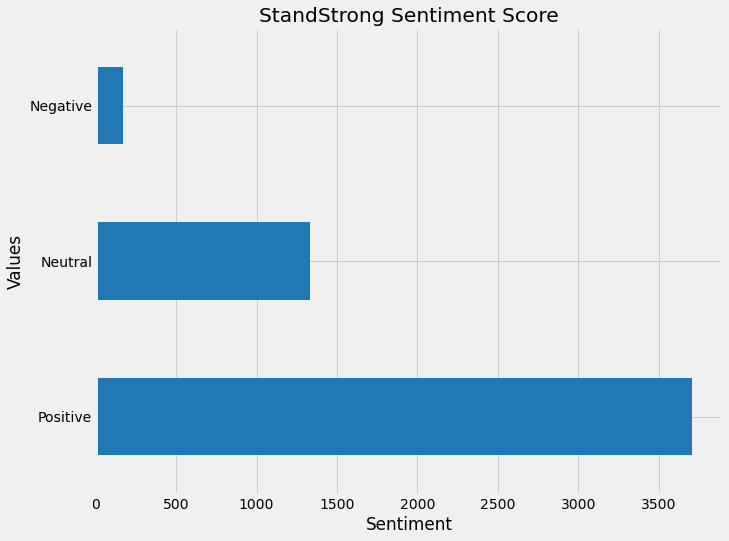

In [15]:
#Plot the values count of sentiment
plt.title("StandStrong Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Values")
plt.rcParams["figure.figsize"] = (10,8)
Burna_Data_Damini["Insight"].value_counts().plot(kind="barh", color="#2078B4")
plt.show()

In [68]:
#sns.countplot(Burna_Data_Damini["Insight"])
#plt.xticks(rotation = 45)

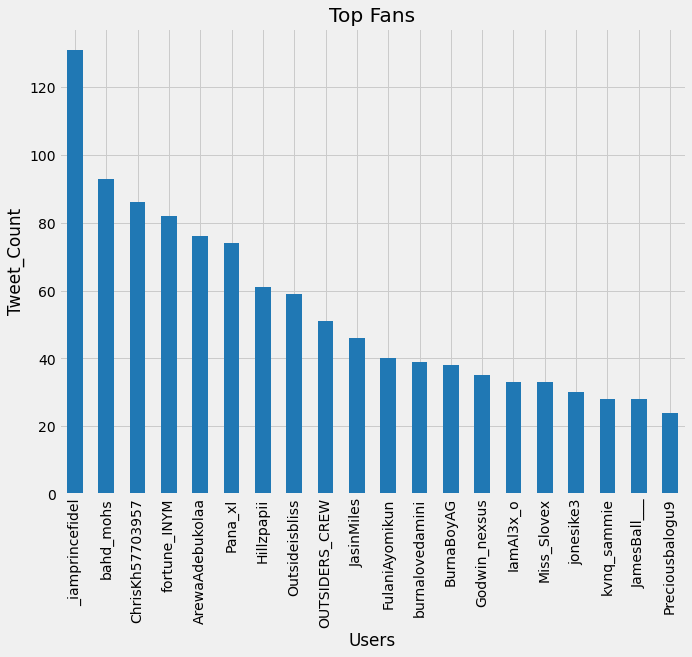

In [39]:
#Plot the values count of Insight get top 20 fans
plt.title("Top Fans")
plt.xlabel("Users")
plt.ylabel("Tweet_Count")
plt.rcParams["figure.figsize"] = (10,8)
Burna_Data_Damini["User"].value_counts()[:20].plot(kind="bar", color="#2078B4")
plt.show()

C:\Users\TemidayoOmoniyi\anaconda3\envs\tfp3.10\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\TemidayoOmoniyi\anaconda3\envs\tfp3.10\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128760 (\N{FLYING SAUCER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


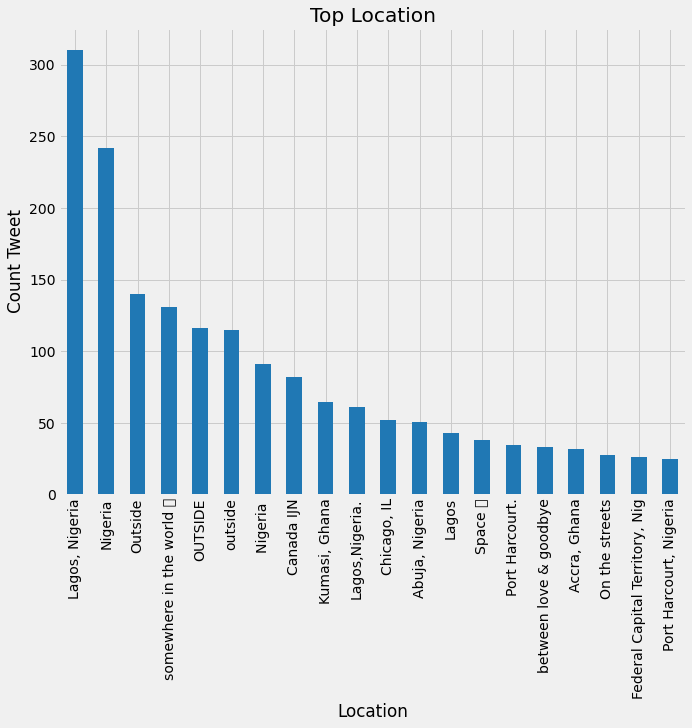

In [70]:
#Location of where the tweet is coming from
plt.title("Top Location")
plt.xlabel("Location")
plt.ylabel("Count Tweet")
Burna_Data_Damini["Location"].value_counts()[:20].plot(kind="bar", color="#2078B4")
plt.show()

If you notice the States are not properly labeled due to location miss-match. 
So we have to use the pandas function find and replace.

In [43]:
# You can futher clean the data by using the find & replace function
#Burna_Data_Damini.replace(to_replace =["Lagos", "Lagos,Nigeria."], 
#                            value ="Lagos, Nigeria")
#Burna_Data_Damini.head()

In [79]:
#Top influencer talking about the album based on number of followers 
Burna_Data_Damini.groupby('User', as_index=False).agg({"Followers": "sum"}).sort_values("Followers", ascending=False)[:20]

,User,Followers
1138,burnaboy,6991174
1555,officialcharts,318456
1569,oluwashina,314453
1040,advtomiwa,309410
1279,fortune_INYM,292740
1011,_iamprincefidel,182980
1476,macdawid,179639
807,Sabichief,176771
1594,pirowbanks,170845
93,ArewaAdebukolaa,157614


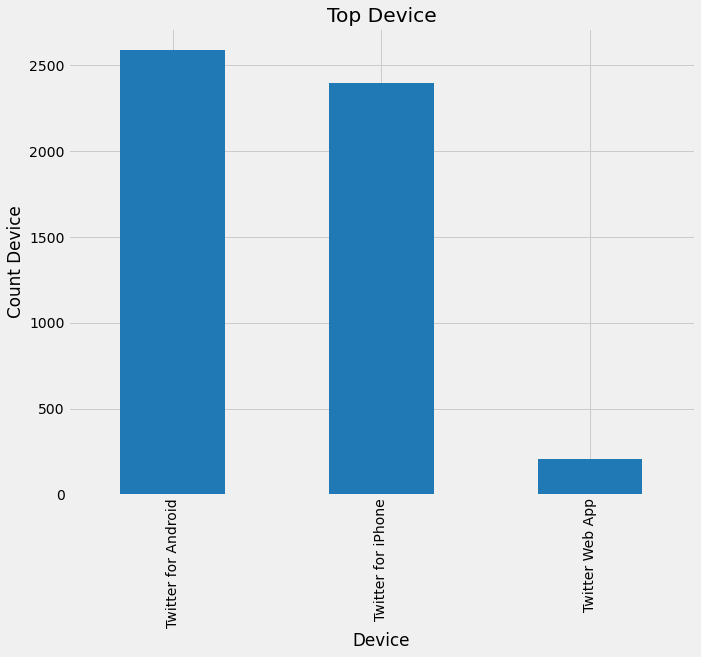

In [86]:
'''sns.countplot(Burna_Data_Damini["Tweet_Source"])
plt.xticks(rotation = 45)'''

#Location of where the tweet is coming from
plt.title("Top Device")
plt.xlabel("Device")
plt.ylabel("Count Device")
Burna_Data_Damini["Tweet_Source"].value_counts()[:3].plot(kind="bar", color="#2078B4")
plt.show()

In [41]:
stopwords = STOPWORDS
print(stopwords)
#Let checkout the stop words in Python

{'these', "hasn't", 'can', 'for', "you're", 'whom', 'there', 'than', 'have', 'hers', 'down', 'yourself', 'theirs', 'of', 'be', 'by', "they've", 'why', 'shall', 'after', 'into', 'if', 'since', 'also', 'then', "here's", 'no', 'and', 'such', 'who', "she's", "she'll", 'should', 'our', "isn't", "let's", 'again', "there's", 'during', 'under', "won't", "when's", 'was', 'as', 'therefore', "we'll", 'them', 'like', 'against', 'or', "they'll", 'is', 'had', 'because', 'its', 'when', 'would', 'few', 'me', 'each', 'ourselves', 'in', 'this', "didn't", 'more', 'else', 'cannot', 'am', 'through', 'where', "she'd", 'www', "don't", 'ought', "how's", 'some', "they're", 'themselves', 'did', 'both', 'what', "couldn't", "he'll", 'further', 'over', 'up', "we'd", 'his', 'only', 'very', "that's", 'until', 'you', 'below', 'about', 'has', "i'll", 'yourselves', 'they', 'which', 'herself', 'him', 'a', 'those', 'could', 'otherwise', "we're", "hadn't", 'too', 'so', 'before', 'all', "i've", 'doing', "he's", 'com', 'r',

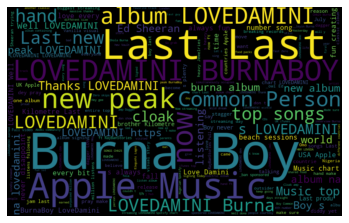

In [45]:
#Let create a wordcloud for better representation of data
Tweet_Word = ' '.join( [twts for twts in Burna_Data_Damini['Tweet']] ) #To join all tweet
wc = WordCloud(
        background_color = "black",
        stopwords = stopwords,
        height = 500,
        width = 800,
        random_state = 21,
        max_font_size = 120
)
wc.generate(Tweet_Word)

plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# You can perform more analysis by splitting the datetime into difference columns 

In [28]:
Burna_Data_Damini["Date"] = pd.DatetimeIndex(Burna_Data_Damini["Time"]).date
Burna_Data_Damini["Date"].head()

0    2022-07-09
1    2022-07-09
2    2022-07-09
3    2022-07-09
4    2022-07-09
Name: Date, dtype: object

In [29]:
Dance_df = Burna_Data_Damini.groupby('Date', as_index=False).agg({"User": "count"})
Dance_df.head()

,Date,User
0,2022-07-09,2137
1,2022-07-10,1075
2,2022-07-11,2000


C:\Users\TemidayoOmoniyi\anaconda3\envs\tfp3.10\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([0, 1, 2]),
 [Text(0, 0, '2022-07-09'),
  Text(1, 0, '2022-07-10'),
  Text(2, 0, '2022-07-11')])

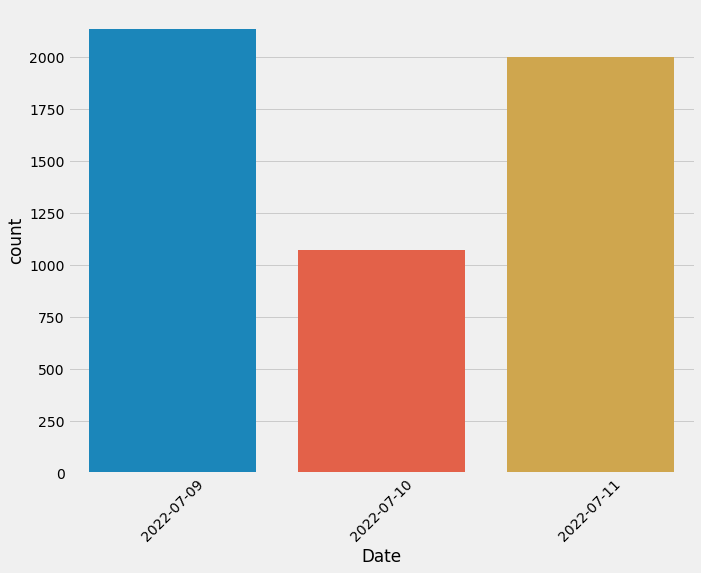

In [30]:
sns.countplot(Burna_Data_Damini["Date"])
plt.xticks(rotation = 45)

In [32]:
px.bar(x="Date", y="User", data_frame=Dance_df, title="Tweet Trend by Days")